**import the jason file using this code**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**download the file with API name**

In [ ]:
!kaggle datasets download -d jaiahuja/skin-cancer-detection

skin-cancer-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


**bold unzip the File**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer-detection.zip')
zip_ref.extractall('/content')
zip_ref.close()

**Import the Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import concatenate
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

**Import the train and test**

In [ ]:
data_dir_train =("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = ("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

**Fix the size**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Preprocessing the train and valid using with Train Data

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


Find the class name

In [ ]:
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the Images**

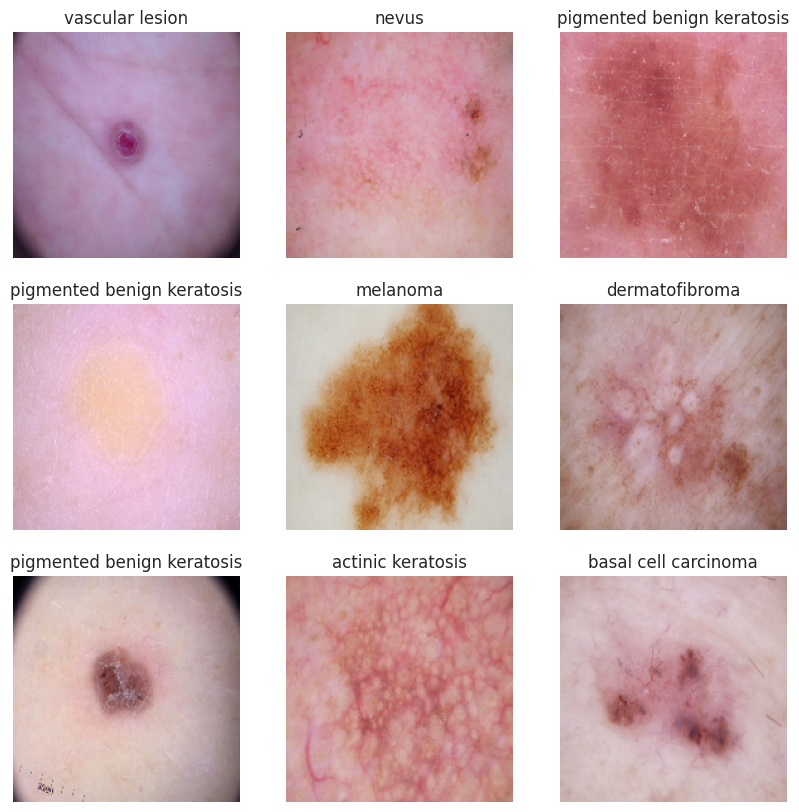

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Fix the Layers and Filters**

In [ ]:
num_classes = 9 # As target class has 9 labels

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 45, 45, 64)       

**Train the Epochs**

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 98s 1s/step - loss: 2.1217 - accuracy: 0.2227 - val_loss: 1.9788 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 78s 1s/step - loss: 1.8489 - accuracy: 0.3438 - val_loss: 1.6576 - val_accuracy: 0.4385
Epoch 3/20
56/56 [==============================] - 76s 1s/step - loss: 1.5364 - accuracy: 0.4576 - val_loss: 1.4451 - val_accuracy: 0.4922
Epoch 4/20
56/56 [==============================] - 75s 1s/step - loss: 1.3766 - accuracy: 0.5173 - val_loss: 1.3497 - val_accuracy: 0.5526
Epoch 5/20
56/56 [==============================] - 78s 1s/step - loss: 1.2954 - accuracy: 0.5385 - val_loss: 1.5905 - val_accuracy: 0.4116
Epoch 6/20
56/56 [==============================] - 74s 1s/step - loss: 1.2379 - accuracy: 0.5681 - val_loss: 1.3583 - val_accuracy: 0.5727
Epoch 7/20
56/56 [==============================] - 74s 1s/step - loss: 1.1572 - accuracy: 0.5820 - val_loss: 1.4161 - val_accuracy: 0.5369
Epoch 8/20
56/56 [==

**Visulaize the Loss and Accuracy**

<Axes: >

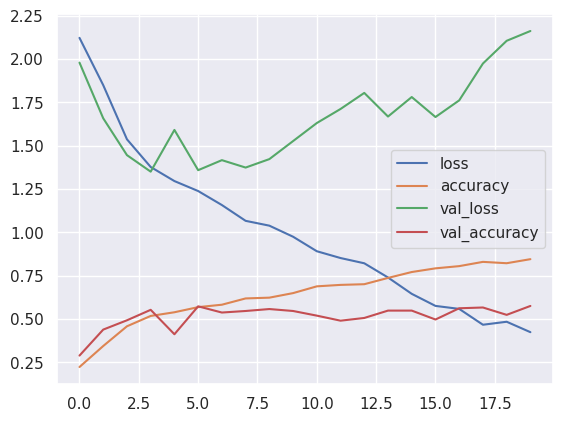

In [ ]:
pd.DataFrame(history.history).plot()

Here we have a less accuracy and high loss it indicates our data was overfitting now i have to do Data Augmentaion

In [ ]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

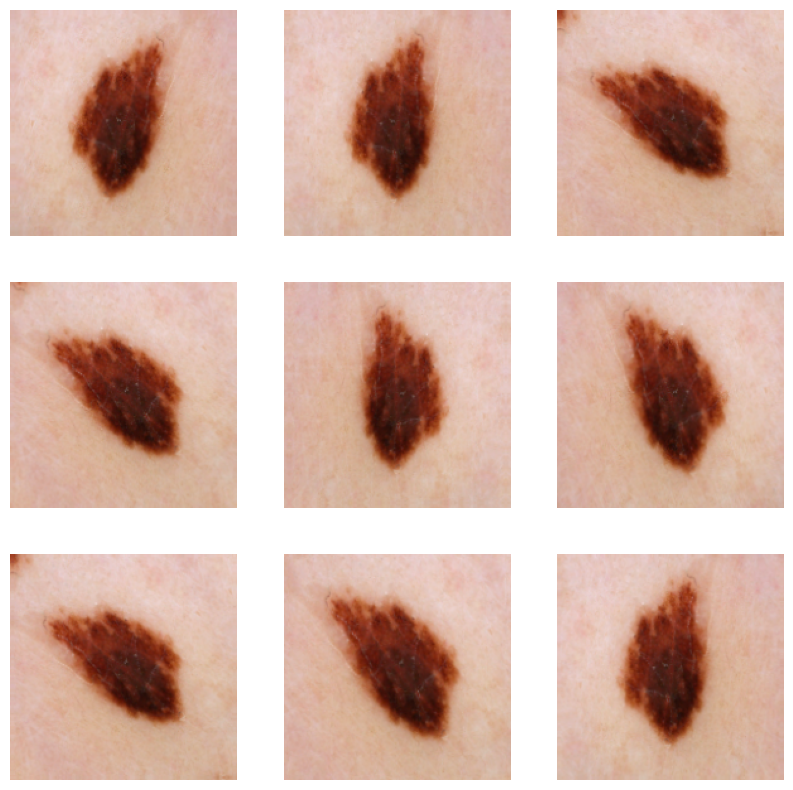

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 97s 2s/step - loss: 1.9918 - accuracy: 0.2835 - val_loss: 1.7719 - val_accuracy: 0.3758
Epoch 2/20
56/56 [==============================] - 84s 1s/step - loss: 1.6967 - accuracy: 0.4001 - val_loss: 1.6208 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 86s 2s/step - loss: 1.5861 - accuracy: 0.4258 - val_loss: 1.5347 - val_accuracy: 0.4631
Epoch 4/20
56/56 [==============================] - 88s 2s/step - loss: 1.5276 - accuracy: 0.4593 - val_loss: 1.4565 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 91s 2s/step - loss: 1.4653 - accuracy: 0.4855 - val_loss: 1.4072 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 86s 2s/step - loss: 1.4426 - accuracy: 0.4939 - val_loss: 1.3965 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 88s 2s/step - loss: 1.3561 - accuracy: 0.5273 - val_loss: 1.3476 - val_accuracy: 0.5280
Epoch 8/20
56/56 [==

After Augmentaion we have a low accuracy and high loss so here is data augmentation is not perfect for this data..then we tried data generater

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Constants
num_classes = 9
batch_size = 32
image_size = (256, 256)
epochs = 10

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Data paths
train_dir = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
val_dir = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [ ]:
# Validation data generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/10
69/69 [==============================] - 451s 7s/step - loss: 2.0319 - accuracy: 0.2823 - val_loss: 2.2238 - val_accuracy: 0.2396
Epoch 2/10
69/69 [==============================] - 423s 6s/step - loss: 1.6701 - accuracy: 0.3933 - val_loss: 2.5070 - val_accuracy: 0.2812
Epoch 3/10
69/69 [==============================] - 412s 6s/step - loss: 1.5916 - accuracy: 0.4273 - val_loss: 2.4839 - val_accuracy: 0.3438
Epoch 4/10
69/69 [==============================] - 410s 6s/step - loss: 1.5158 - accuracy: 0.4626 - val_loss: 2.1088 - val_accuracy: 0.2604
Epoch 5/10
69/69 [==============================] - 414s 6s/step - loss: 1.4504 - accuracy: 0.4816 - val_loss: 2.5302 - val_accuracy: 0.2500
Epoch 6/10
69/69 [==============================] - 415s 6s/step - loss: 1.4359 - accuracy: 0.4871 - val_loss: 2.3293 - val_accuracy: 0.3646
Epoch 7/10
69/69 [==============================] - 407s 6s/step - loss: 1.3839 - accuracy: 0.5066 - val_loss: 2.3681 - val_accuracy: 0.3438
Epoch 8/10
69


After data genarator still our model was overfitting

Now we use Dropout and and early stopping to clear the overfitting

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
num_classes = 9
batch_size = 32
image_size = (256, 256)
epochs = 20

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the model with regularization and dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])



Found 118 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/20
3/3 [==============================] - 38s 14s/step - loss: 10.1367 - accuracy: 0.1163 - val_loss: 2.5560 - val_accuracy: 0.0938
Epoch 2/20
3/3 [==============================] - 33s 12s/step - loss: 3.6742 - accuracy: 0.1395 - val_loss: 2.1749 - val_accuracy: 0.1354
Epoch 3/20
3/3 [==============================] - 45s 17s/step - loss: 2.1620 - accuracy: 0.1354 - val_loss: 2.1848 - val_accuracy: 0.1146
Epoch 4/20
3/3 [==============================] - 33s 12s/step - loss: 2.1299 - accuracy: 0.1628 - val_loss: 2.1484 - val_accuracy: 0.1146
Epoch 5/20
3/3 [==============================] - 38s 14s/step - loss: 2.1247 - accuracy: 0.1562 - val_loss: 2.1284 - val_accuracy: 0.1458
Epoch 6/20
3/3 [==============================] - 35s 13s/step - loss: 2.1773 - accuracy: 0.1458 - val_loss: 2.1585 - val_accuracy: 0.1250
Epoch 7/20
3/3 [==============================] - 32s 11s/step - loss: 2.0979 - accuracy: 0.1512 - val_loss: 2.1543 - val_accuracy: 0.1875
Epoch 8/20
3/3 [==========

In [ ]:
# Constants
num_classes = 9
batch_size = 32
image_size = (256, 256)
epochs = 50  # Increase the number of epochs

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)



In [ ]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
# Build a more complex model with additional layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/50
69/69 [==============================] - 596s 8s/step - loss: 2.2966 - accuracy: 0.1781 - val_loss: 2.1411 - val_accuracy: 0.1562
Epoch 2/50
69/69 [==============================] - 531s 8s/step - loss: 2.0228 - accuracy: 0.2139 - val_loss: 2.3394 - val_accuracy: 0.2083
Epoch 3/50
69/69 [==============================] - 526s 8s/step - loss: 1.8820 - accuracy: 0.3009 - val_loss: 2.1940 - val_accuracy: 0.2188
Epoch 4/50
69/69 [==============================] - 521s 8s/step - loss: 1.7995 - accuracy: 0.3303 - val_loss: 2.1769 - val_accuracy: 0.3229
Epoch 5/50
69/69 [==============================] - 520s 8s/step - loss: 1.6837 - accuracy: 0.3865 - val_loss: 2.3024 - val_accuracy: 0.2500
Epoch 6/50
69/69 [==============================] - 531s 8s/step - loss: 1.6571 - accuracy: 0.3901 - val_loss: 2.2155 - val_accuracy: 0.2188


Here is train and val both accuracy low its indicated our data was underfitting

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.preprocessing.image import ImageDataGenerator


<ipython-input-153-509333c7c643>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


In [ ]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Conv2D(hp.Int('units', min_value=32, max_value=256, step=32), (3, 3), activation='relu', input_shape=(256, 256, 3)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(layers.Flatten())
        model.add(layers.Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

In [ ]:
# Initialize RandomSearch tuner
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_directory',  # Directory to store tuning results
    project_name='my_tuner'
)

In [ ]:
# Perform hyperparameter tuning
tuner.search(
    train_generator,
    epochs=10,
    validation_data=test_generator,  # Provide validation data for tuning
    validation_steps=test_generator.samples // batch_size
)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
192               |192               |units
0.2               |0.2               |dropout

Epoch 1/10
70/70 [==============================] - 732s 10s/step - loss: 14.5315 - accuracy: 0.2510 - val_loss: 2.6727 - val_accuracy: 0.1875
Epoch 2/10
70/70 [==============================] - 699s 10s/step - loss: 1.8585 - accuracy: 0.3189 - val_loss: 2.7747 - val_accuracy: 0.1771
Epoch 3/10
70/70 [==============================] - 687s 10s/step - loss: 1.8517 - accuracy: 0.3493 - val_loss: 2.8749 - val_accuracy: 0.2292
Epoch 4/10
70/70 [==============================] - 692s 10s/step - loss: 1.7277 - accuracy: 0.3953 - val_loss: 3.3346 - val_accuracy: 0.2708
Epoch 5/10
70/70 [==============================] - 759s 11s/step - loss: 1.7721 - accuracy: 0.3863 - val_loss: 2.9395 - val_accuracy: 0.2396
Epoch 6/10
70/70 [==============================] - 755s 11s/step - loss: 1.7538 - accuracy: 0.3823 - val_loss: 2.4079

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters)

In [ ]:
# Train the best model
best_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)